In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#removal of unnecessary attributes
data=sns.load_dataset('titanic')
data.drop(['who','adult_male','deck','alive','alone','embark_town','class'],axis=1,inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 1. Examine a dataset and classify variables by their type: quantitative vs. categorical

In [60]:
#classfication of Numerical and Categorical attributes
def get_var_category(data):
    unique_count=data.nunique(dropna=False)
    total_count=len(data)
    if pd.api.types.is_numeric_dtype(data):
        return "Numerical"
    elif pd.api.types.is_datetime64_dtype(data):
        return "Date"
    elif unique_count==total_count:
        return "Text(Unique)"
    else:
        return "Categorical"
    
def print_categories(data):
    for column_name in data.columns:
        print(column_name, ": ", get_var_category(data[column_name]))
print_categories(data)

survived :  Numerical
pclass :  Numerical
sex :  Categorical
age :  Numerical
sibsp :  Numerical
parch :  Numerical
fare :  Numerical
embarked :  Categorical


## 2. Handle categorical variables with numerically coded values

In [46]:
# assigning male as 0 female as 1
data['fare']=data["fare"].fillna(data['fare'].dropna().median())
data['age']=data['age'].fillna(data['age'].dropna().median())
data.loc[data['sex']=='male','sex']=0
data.loc[data['sex']=='female','sex']=1
#assigning Southampton city(S) as 0 Cherbourg(C) as 1 and Queenstown(Q) as 2
data['embarked']=data['embarked'].fillna('S')
data.loc[data['embarked']=='S','embarked']=0
data.loc[data['embarked']=='C','embarked']=1
data.loc[data['embarked']=='Q','embarked']=2

In [47]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


## 3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset

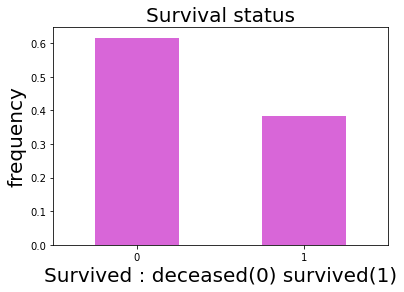

In [106]:
data.survived.value_counts(normalize=True).plot(color='m',alpha=0.6,kind='bar')
plt.xlabel('Survived : deceased(0) survived(1)',size=20)
plt.ylabel('frequency',size=20)
plt.title('Survival status',size=20)
plt.xticks(rotation=0)
plt.show()
#this shows, total survived(male+female) are around 35-40% and not survived(male+female) are around 60%

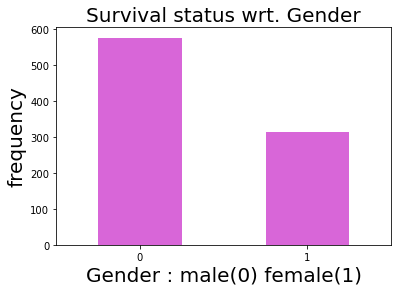

In [105]:
data.sex.value_counts().plot(color='m',alpha=0.6,kind='bar')
plt.xlabel('Gender : male(0) female(1)',size=20)
plt.ylabel('frequency',size=20)
plt.title('Survival status wrt. Gender',size=20)
plt.xticks(rotation=0)
plt.show()
#thus, the graph shows total men and women ratio on the ship 

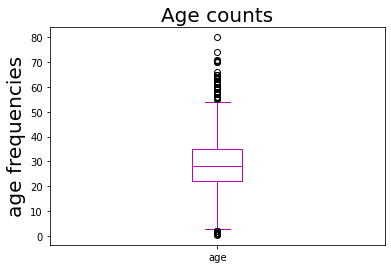

In [117]:
data.age.plot(color='m',kind='box')
plt.ylabel('age frequencies',size=20)
plt.title('Age counts',size=20)
plt.show()

Text(0.5, 1.0, 'Total passengers of all classes')

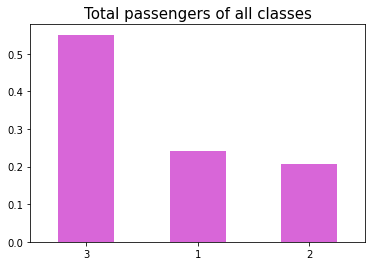

In [123]:
data.pclass.value_counts(normalize=True).plot(color='m',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Total passengers of all classes",size=15)
#graphs shows total 1st,2nd and 3rd class people on the ship (survived+deceased)
# around 60% from 3rd class,and 20-20% of 1st and 2nd class onboarded

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

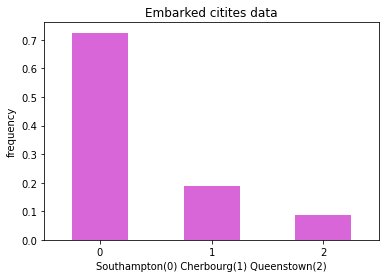

In [126]:
data.embarked.value_counts(normalize=True).plot(color='m',alpha=0.6,kind='bar')
plt.xlabel('Southampton(0) Cherbourg(1) Queenstown(2)')
plt.ylabel('frequency')
plt.title("Embarked citites data")
plt.xticks(rotation=0)
# thus, 70% passengers embarked from Southampton, 20% from Cherbourg and 10% from Queenstown

## Bivariate analysis

Text(0.5, 1.0, 'Age wrt. Survived')

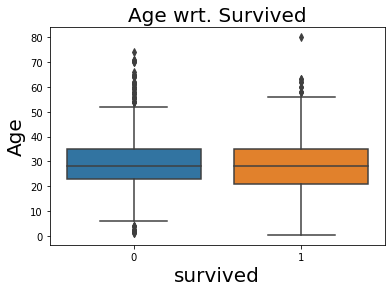

In [135]:
sns.boxplot(x='survived',y='age',data=data)
plt.xlabel('survived',size=20)
plt.ylabel('Age',size=20)
plt.title('Age wrt. Survived',size=20)
# graphs shows total survival status for different ages passengers

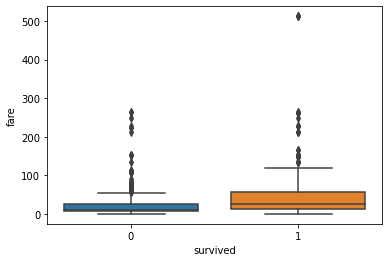

In [17]:
sns.boxplot(x='survived',y='fare',data=data)

Text(0.5, 1.0, 'Men Survived')

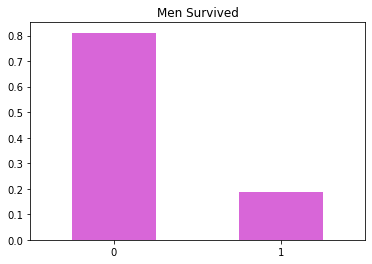

In [20]:
data.survived[data.sex=='male'].value_counts(normalize=True).plot(color='m',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Men Survived")
#thus, the graph shows that total of 15-20% of males were survived rest not.

Text(0.5, 1.0, 'WoMen Survived')

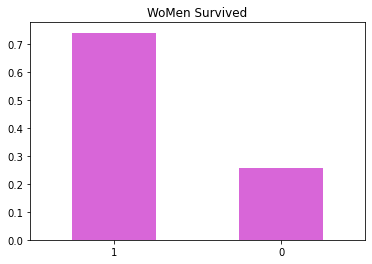

In [24]:
data.survived[data.sex=='female'].value_counts(normalize=True).plot(color='m',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("WoMen Survived")
# this graph shows that total of 70-75% of survivors were females and
#25-30% were deceased

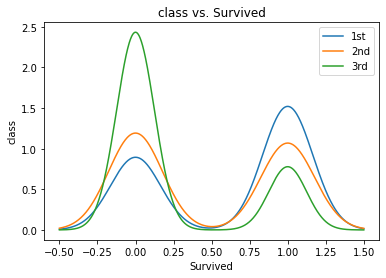

In [42]:
for x in [1,2,3]:
    data.survived[data.pclass==x].plot(kind='kde')
    
plt.xlabel('Survived')
plt.ylabel('class')
plt.title('class vs. Survived')
plt.legend(('1st','2nd','3rd'))
# graphs shows most of the passengers of 3rd class(green line) were deceased after 'em 2nd class and then first
# while another distribution on the right shows most of the passengers of 1st class(blue line) were survived then 2nd then 1st

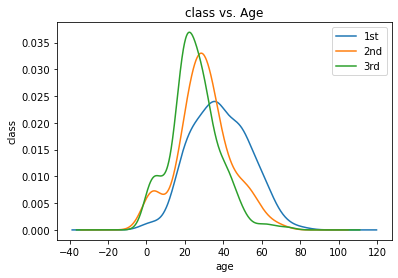

In [43]:
for x in [1,2,3]:
    data.age[data.pclass==x].plot(kind='kde')
plt.xlabel('age')
plt.ylabel('class')
plt.title("class vs. Age")
plt.legend(('1st','2nd','3rd'))
#blue line shows that 1st class most of the passengers have age 38-40
#orange line shows that 2nd class most of the passengers have age 25-40(most of them)
#green line shows that 3rd class passengers have age 20-40(mostly)

## 4.  Identify and treat missing values and remove dataset outliers

In [48]:
data['fare']=data["fare"].fillna(data['fare'].dropna().median())
data['age']=data['age'].fillna(data['age'].dropna().median())
data.loc[data['sex']=='male','sex']=0
data.loc[data['sex']=='female','sex']=1

data['embarked']=data['embarked'].fillna('S')
data.loc[data['embarked']=='S','embarked']=0
data.loc[data['embarked']=='C','embarked']=1
data.loc[data['embarked']=='Q','embarked']=2

C:\Users\MONIKA JOSHI\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [49]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [75]:
data.isnull().sum()
#thus no missing values

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [79]:
data.describe()

,survived,pclass,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


## 5. Build a correlation matrix to identify relevant variables ( Graph )

In [59]:
data.corr()
#The above heatmap shows dependency between Sex and Survived and the correlation value is 0.54. 
#And we can also see the overall distribution of every attribute with respect to that of another

,survived,pclass,age,sibsp,parch,fare,embarked
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.106811
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.045702
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.009165
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059961
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.078665
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.062142
embarked,0.106811,0.045702,-0.009165,-0.059961,-0.078665,0.062142,1.000000


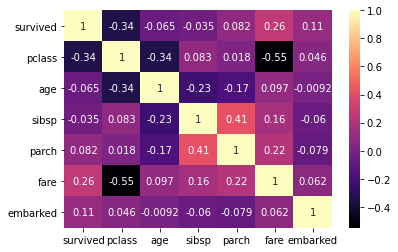

In [77]:
sns.heatmap(data.corr(),annot=True,cmap='magma')
plt.show()

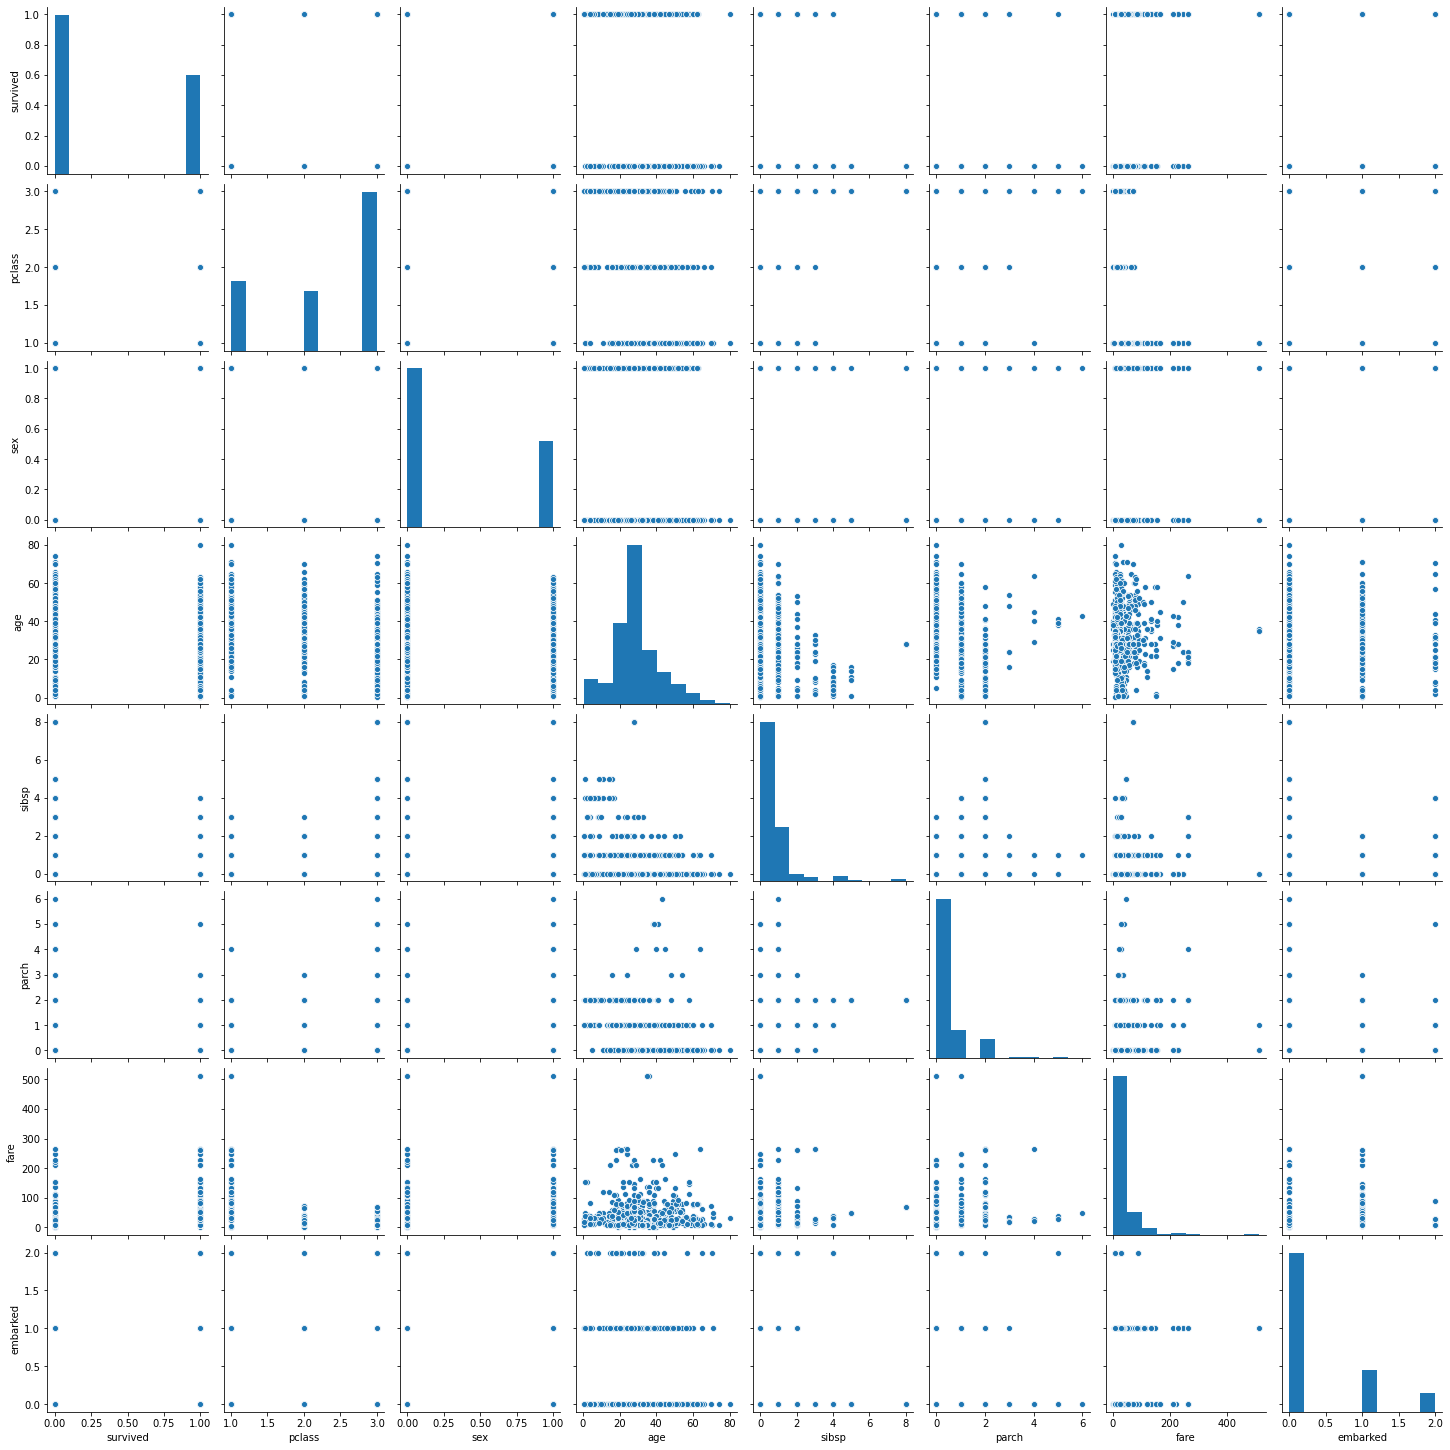

In [71]:
sns.pairplot(data)
plt.show()